In [51]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

# For time stamps
from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# Model Building
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

# Preprocessing & Data Evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, metrics

In [52]:
# The tech companies (Apple, Google, Microsoft, and Amazon) stocks we'll use for this analysis
t_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Seting up End and Start times for data fetching
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for fetching yahoo finance data and setting as a dataframe
for stock in t_list:   
    # Seting DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [53]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, company_name in zip(company_list, company_name):
    company["company_name"] = company_name
    
df = pd.concat(company_list, axis=0)

In [54]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-17,70.442497,69.699997,69.892502,70.102501,114158400.0,69.502274,APPLE
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400.0,69.336212,APPLE
2019-12-19,70.294998,69.737503,69.875000,70.004997,98369200.0,69.405609,APPLE
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,69.261856,APPLE
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,70.392090,APPLE
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.459007,APPLE
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.856941,APPLE
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.829674,APPLE
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.255997,APPLE


In [55]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300.0,3158.000000,AMAZON
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300.0,3177.290039,AMAZON
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800.0,3104.199951,AMAZON
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200.0,3101.489990,AMAZON
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700.0,3116.419922,AMAZON
2020-12-14,3190.469971,3126.000000,3143.000000,3156.969971,4155800.0,3156.969971,AMAZON
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700.0,3165.120117,AMAZON
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4427600.0,3240.959961,AMAZON
2020-12-17,3263.510010,3221.000000,3250.000000,3236.080078,3468600.0,3236.080078,AMAZON


In [56]:
# Summary Stats of Apple stocks
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,94.496853,91.845363,93.142206,93.241400,1.559650e+08,92.916556
std,21.425377,20.879602,21.323996,21.135567,7.173483e+07,21.278197
min,57.125000,53.152500,57.020000,56.092499,1.676115e+07,55.744217
25%,75.924999,74.207500,75.023750,75.122501,1.091104e+08,74.567722
50%,89.139999,87.772499,88.312500,88.209999,1.378164e+08,87.899590
75%,116.475002,113.560001,115.030003,115.045002,1.865058e+08,114.846863
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [57]:
# Summary Stats Microsoft stocks
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,193.060353,188.082742,190.566980,190.678431,3.736978e+07,189.676979
std,23.058224,23.438380,23.386811,23.287149,1.698275e+07,23.653315
min,140.570007,132.520004,137.009995,135.419998,7.415537e+06,134.366470
25%,173.709999,167.824997,170.814995,170.389999,2.573735e+07,169.034622
50%,198.529999,194.000000,195.779999,196.330002,3.265680e+07,195.345123
75%,213.965004,208.885002,211.435005,211.184998,4.360900e+07,210.529266
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105


In [58]:
# Summary Stats of Google stocks
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,1485.439099,1449.213279,1466.372864,1468.015585,1.877836e+06,1468.015585
std,169.660883,173.085849,171.155447,170.504824,7.693801e+05,170.504824
min,1071.319946,1013.536011,1056.510010,1056.619995,2.716980e+05,1056.619995
25%,1391.434998,1350.500000,1363.169983,1373.337463,1.394100e+06,1373.337463
50%,1481.295044,1449.301025,1462.910034,1464.699951,1.657400e+06,1464.699951
75%,1574.392517,1526.902527,1548.575012,1551.730042,2.123050e+06,1551.730042
max,1847.199951,1822.650024,1824.520020,1827.989990,4.329100e+06,1827.989990


In [59]:
# Summary Stats Amazon stocks
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,2664.820582,2591.794666,2629.464826,2629.581881,4.909312e+06,2629.581881
std,568.853610,551.532068,564.348285,559.050173,1.995107e+06,559.050173
min,1759.449951,1626.030029,1641.510010,1676.609985,4.893510e+05,1676.609985
25%,2050.750000,2006.710022,2028.150024,2025.734985,3.472500e+06,2025.734985
50%,2697.429932,2636.110107,2678.080078,2675.010010,4.512200e+06,2675.010010
75%,3192.174927,3118.584961,3162.494995,3152.984985,5.794700e+06,3152.984985
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951


In [60]:
# General Amazon stocks info
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-12-17 to 2020-12-18
Data columns (total 7 columns):
High            255 non-null float64
Low             255 non-null float64
Open            255 non-null float64
Close           255 non-null float64
Volume          255 non-null int64
Adj Close       255 non-null float64
company_name    255 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [61]:
# General Microsoft stocks info
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-12-17 to 2020-12-18
Data columns (total 7 columns):
High            255 non-null float64
Low             255 non-null float64
Open            255 non-null float64
Close           255 non-null float64
Volume          255 non-null float64
Adj Close       255 non-null float64
company_name    255 non-null object
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


In [62]:
# General Google stocks info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-12-17 to 2020-12-18
Data columns (total 7 columns):
High            255 non-null float64
Low             255 non-null float64
Open            255 non-null float64
Close           255 non-null float64
Volume          255 non-null int64
Adj Close       255 non-null float64
company_name    255 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [63]:
# General Apple stocks info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-12-17 to 2020-12-18
Data columns (total 7 columns):
High            255 non-null float64
Low             255 non-null float64
Open            255 non-null float64
Close           255 non-null float64
Volume          255 non-null float64
Adj Close       255 non-null float64
company_name    255 non-null object
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


#### Is their any correlation between different stocks ?

In [64]:
# Fetching all the closing prices for the companies stock list into a new DataFrame
closing_df = DataReader(t_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-12-17,69.502274,1790.660034,1355.119995,153.068451
2019-12-18,69.336212,1784.030029,1352.619995,152.751816
2019-12-19,69.405609,1792.280029,1356.040039,154.077759
2019-12-20,69.261856,1786.500000,1349.589966,155.759949
2019-12-23,70.392090,1793.000000,1348.839966,155.759949


In [65]:
# Now that we have all the closing prices, here we can check the daily return for all the stocks, by calculating the percentage change.
# Creating new dataframe for returns on stock of our companies
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-12-17,NaN,NaN,NaN,NaN
2019-12-18,-0.002389,-0.003703,-0.001845,-0.002069
2019-12-19,0.001001,0.004624,0.002528,0.008680
2019-12-20,-0.002071,-0.003225,-0.004757,0.010918
2019-12-23,0.016318,0.003638,-0.000556,0.000000


#### Now Here we can compare the daily percentage returns of two stocks to check how they correlated to each others.

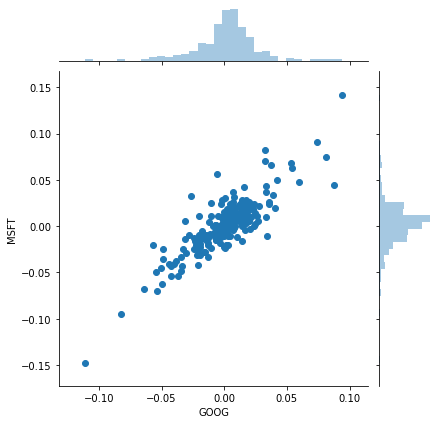

In [66]:
# Comparing the daily returns of Google and Microsoft
import seaborn as sns
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

#### Its good to see that both tech companies google and Microsft are posittively corelated to each other and a linear relationship bewteen its daily return values should occur.

C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


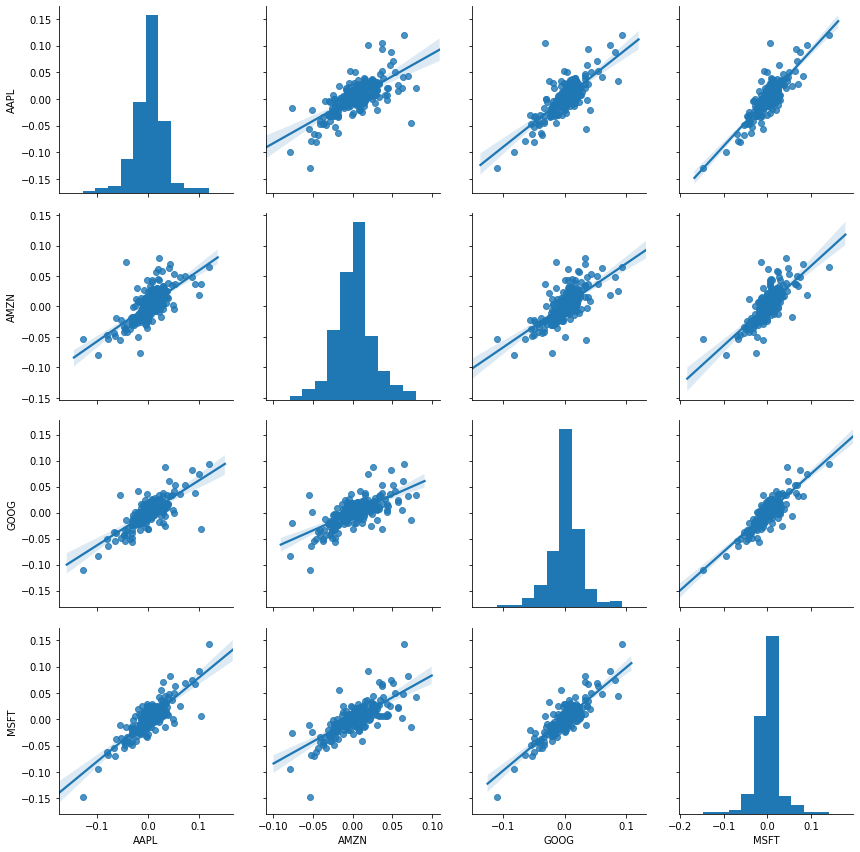

In [67]:
# Now we will use pair plot to make comparison analysis for every possible combinations of stocks in our list 
sns.pairplot(tech_rets,palette="bright",kind="reg",diag_kind="auto",size=3)

#### Now Here we can compare the daily closing price of two stocks to check how they correlated to each others.

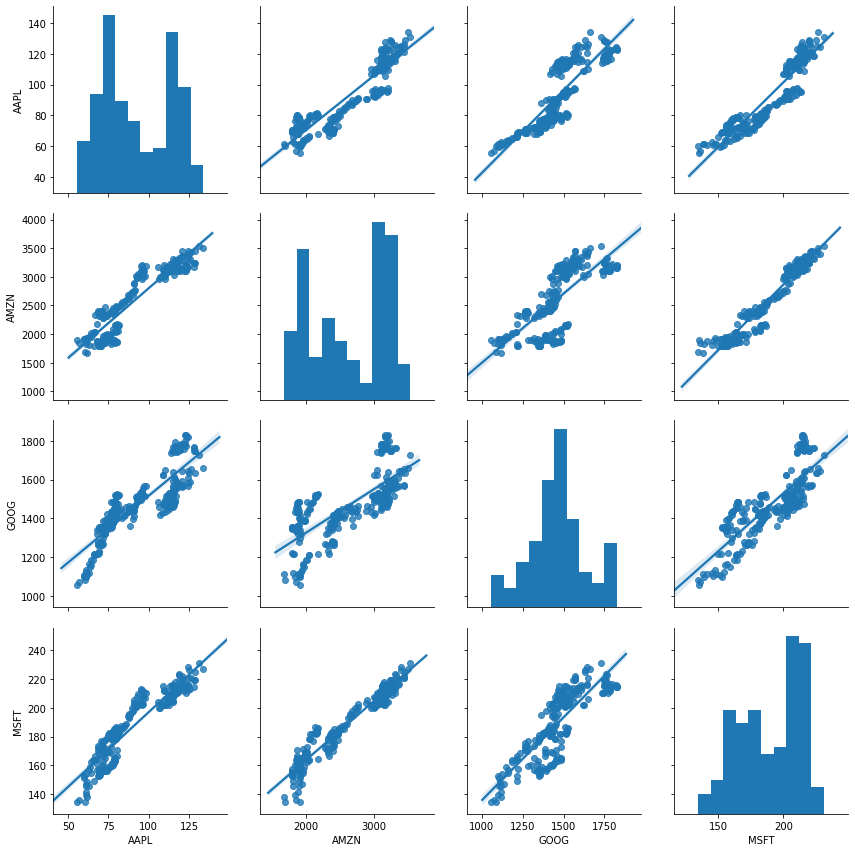

In [68]:
sns.pairplot(closing_df,palette="bright",kind="reg",diag_kind="auto",size=3)

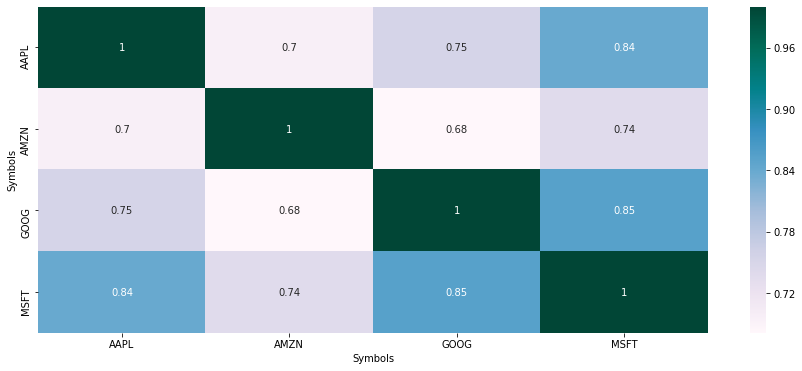

In [69]:
# Another way to see correlation using Heatmap
# stock Returns
plt.figure(figsize=(15,6))
sns.heatmap(tech_rets.corr(), annot=True, cmap='PuBuGn')

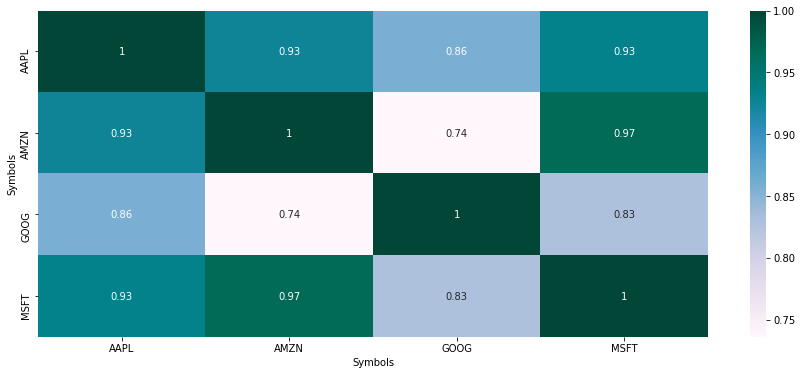

In [70]:
# Closing Price
plt.figure(figsize=(15,6))
sns.heatmap(closing_df.corr(), annot=True, cmap='PuBuGn')

#### Its good to see that all the companies are positively correlated to each other and almost > 0.70

In [71]:
# Now considering the Amazon Stock Dataset

In [72]:
amz_df = DataReader('AMZN', data_source='yahoo', start='2001-01-01', end=datetime.now())
amz_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,16.0000,13.6250,15.8125,13.8750,9203500,13.8750
2001-01-03,17.8750,13.5625,13.6250,17.5625,14680400,17.5625
2001-01-04,17.5625,15.4375,17.0000,15.5000,10620500,15.5000
2001-01-05,15.8750,13.5625,15.5000,14.5625,8798800,14.5625
2001-01-08,15.5625,13.7500,14.4375,14.9375,10444700,14.9375


In [73]:
amz_df.reset_index(inplace=True)
amz_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2001-01-02,16.0000,13.6250,15.8125,13.8750,9203500,13.8750
1,2001-01-03,17.8750,13.5625,13.6250,17.5625,14680400,17.5625
2,2001-01-04,17.5625,15.4375,17.0000,15.5000,10620500,15.5000
3,2001-01-05,15.8750,13.5625,15.5000,14.5625,8798800,14.5625
4,2001-01-08,15.5625,13.7500,14.4375,14.9375,10444700,14.9375


In [74]:
print("Total records in Amazon Stocks Datasets: {}".format(len(amz_df)))

Total records in Amazon Stocks Datasets: 5024


In [75]:
# checking for null values in both the datasets
print(amz_df.isna().any())

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool


In [76]:
amz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
Date         5024 non-null datetime64[ns]
High         5024 non-null float64
Low          5024 non-null float64
Open         5024 non-null float64
Close        5024 non-null float64
Volume       5024 non-null int64
Adj Close    5024 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 274.8 KB


#### Data Pre-processing

In [77]:
# dropping duplicates if any
amz_df = amz_df.drop_duplicates()

# Coverting the datatype of column 'Date' from  object to 'datetime'
amz_df['Date'] = pd.to_datetime(amz_df['Date']).dt.normalize()

# filtering the important columns required
amz_df = amz_df.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

# Setting column 'Date' as the index column
amz_df.set_index('Date', inplace= True)

# Sorting the data according to Date
amz_df = amz_df.sort_index(ascending=True, axis=0)
amz_df

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,13.875000,15.812500,16.000000,13.625000,9203500
2001-01-03,17.562500,13.625000,17.875000,13.562500,14680400
2001-01-04,15.500000,17.000000,17.562500,15.437500,10620500
2001-01-05,14.562500,15.500000,15.875000,13.562500,8798800
2001-01-08,14.937500,14.437500,15.562500,13.750000,10444700
2001-01-09,16.375000,14.562500,16.625000,14.562500,23455200
2001-01-10,16.500000,15.843750,17.000000,15.562500,11002500
2001-01-11,17.000000,15.750000,17.312500,15.625000,12756600
2001-01-12,17.687500,17.343750,18.500000,17.125000,8434200


In [78]:
amz_df.head()

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,13.8750,15.8125,16.0000,13.6250,9203500
2001-01-03,17.5625,13.6250,17.8750,13.5625,14680400
2001-01-04,15.5000,17.0000,17.5625,15.4375,10620500
2001-01-05,14.5625,15.5000,15.8750,13.5625,8798800
2001-01-08,14.9375,14.4375,15.5625,13.7500,10444700


In [79]:
amz_df.tail()

,Close,Open,High,Low,Volume
Date,,,,,
2020-12-14,3156.969971,3143.00000,3190.469971,3126.000000,4155800
2020-12-15,3165.120117,3181.01001,3188.500000,3130.489990,3323700
2020-12-16,3240.959961,3176.01001,3247.000000,3163.679932,4427600
2020-12-17,3236.080078,3250.00000,3263.510010,3221.000000,3468600
2020-12-18,3244.379883,3250.00000,3249.419922,3237.110107,499874


In [80]:
amz_df.shape

(5024, 5)

In [81]:
amz_df.describe(include='all')

,Close,Open,High,Low,Volume
count,5024.000000,5024.000000,5024.000000,5024.000000,5.024000e+03
mean,489.052993,489.113031,494.483886,483.110410,6.362098e+06
std,721.134597,721.566501,729.552133,712.175388,5.038014e+06
min,5.970000,5.910000,6.100000,5.510000,4.998740e+05
25%,42.700001,42.527499,43.365001,42.110000,3.557250e+06
50%,173.195000,172.269997,174.505005,170.160004,5.289250e+06
75%,582.095001,580.455002,589.857498,573.257492,7.584175e+06
max,3531.449951,3547.000000,3552.250000,3486.689941,1.043292e+08


In [82]:
# Preparing and Calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(amz_df)-1))

# using 80% of data for training and 20% for testing
train_end = int(data_to_use*0.8)
total_data = len(amz_df)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:",total_data - train_end)

Number of records in Training Data: 4018
Number of records in Test Data: 1006


In [83]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = amz_df.iloc[start:total_data,0] #close
open_price = amz_df.iloc[start:total_data,1] #open
high = amz_df.iloc[start:total_data,2] #high
low = amz_df.iloc[start:total_data,3] #low
volume = amz_df.iloc[start:total_data,4] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2001-01-03      17.562500
2001-01-04      15.500000
2001-01-05      14.562500
2001-01-08      14.937500
2001-01-09      16.375000
2001-01-10      16.500000
2001-01-11      17.000000
2001-01-12      17.687500
2001-01-16      18.062500
2001-01-17      18.375000
2001-01-18      19.500000
2001-01-19      19.937500
2001-01-22      18.500000
2001-01-23      18.953125
2001-01-24      21.875000
2001-01-25      19.000000
2001-01-26      19.500000
2001-01-29      20.125000
2001-01-30      18.937500
2001-01-31      17.312500
2001-02-01      16.250000
2001-02-02      14.375000
2001-02-05      14.437500
2001-02-06      15.812500
2001-02-07      15.000000
2001-02-08      14.375000
2001-02-09      13.375000
2001-02-12      14.500000
2001-02-13      13.750000
2001-02-14      14.437500
                 ...     
2020-11-06    3311.370117
2020-11-09    3143.739990
2020-11-10    3035.020020
2020-11-11    3137.389893
2020-11-12    3110.280029
2020-11-13    3128.810059
2020-11-16    3131.060059
2020-11

In [84]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,volume,open_price,high,low
Date,,,,,,
2001-01-03,17.5625,15.5000,14680400,13.62500,17.8750,13.5625
2001-01-04,15.5000,14.5625,10620500,17.00000,17.5625,15.4375
2001-01-05,14.5625,14.9375,8798800,15.50000,15.8750,13.5625
2001-01-08,14.9375,16.3750,10444700,14.43750,15.5625,13.7500
2001-01-09,16.3750,16.5000,23455200,14.56250,16.6250,14.5625
2001-01-10,16.5000,17.0000,11002500,15.84375,17.0000,15.5625
2001-01-11,17.0000,17.6875,12756600,15.75000,17.3125,15.6250
2001-01-12,17.6875,18.0625,8434200,17.34375,18.5000,17.1250
2001-01-16,18.0625,18.3750,6017000,18.31250,18.3750,17.2500


In [85]:
# setting the target variable as the shifted close_price
# setting the features dataset for prediction  
cols = ['close_price', 'volume', 'open_price', 'high', 'low']
x = data[cols]
y = data['close_price_shifted']

In [86]:
x.shape,y.shape

((5022, 5), (5022,))

#### Scaling the Target Variable and the Feature Dataset

In [87]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

In [88]:
# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [89]:
x

array([[-0.99342359, -0.73321643, -0.99564258, -0.99335899, -0.9953737 ],
       [-0.99459364, -0.81170812, -0.99373639, -0.99353524, -0.99429647],
       [-0.99512549, -0.84692778, -0.99458359, -0.99448698, -0.9953737 ],
       ...,
       [ 0.79218158, -0.9527801 ,  0.79328964,  0.79484793,  0.79535677],
       [ 0.83520542, -0.93143795,  0.79046565,  0.82784146,  0.81442499],
       [ 0.83243707, -0.94997868,  0.83225504,  0.83715297,  0.84735639]])

In [90]:
y

array([[-0.99459364],
       [-0.99512549],
       [-0.99491275],
       ...,
       [ 0.83520542],
       [ 0.83243707],
       [ 0.83714554]])

#### Dividing the dataset into Training and Test

Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [91]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (4018, 5) and y: (4018, 1)
Number of rows and columns in the Test set X: (1003, 5) and y: (1003, 1)


In [92]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (4018, 5, 1)
Shape of Test set X: (1003, 5, 1)


### Constructing the model

In [93]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(0)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 100)            40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 100)            80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [94]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Train on 3214 samples, validate on 804 samples
Epoch 1/10
3214/3214 [==============================] - 14s 4ms/step - loss: 0.0170 - val_loss: 0.0269
Epoch 2/10
3214/3214 [==============================] - 11s 3ms/step - loss: 0.0037 - val_loss: 0.0276
Epoch 3/10
3214/3214 [==============================] - 11s 3ms/step - loss: 0.0030 - val_loss: 0.0163
Epoch 4/10
3214/3214 [==============================] - 11s 4ms/step - loss: 0.0030 - val_loss: 0.0357
Epoch 5/10
3214/3214 [==============================] - 11s 4ms/step - loss: 0.0029 - val_loss: 0.0370
Epoch 6/10
3214/3214 [==============================] - 14s 4ms/step - loss: 0.0030 - val_loss: 0.0342
Epoch 7/10
3214/3214 [==============================] - 12s 4ms/step - loss: 0.0026 - val_loss: 0.0167
Epoch 8/10
3214/3214 [==============================] - 11s 4ms/step - loss: 0.0029 - val_loss: 0.0296
Epoch 9/10
3214/3214 [==============================] - 12s 4ms/step - loss: 0.0025 - val_loss: 0.0266
Epoch 10/10
3214/3214 [===

In [95]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:4]

Predictions:


array([[434.92944],
       [440.31772],
       [447.90402],
       [442.9587 ]], dtype=float32)

In [96]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

1003/1003 [==============================] - 5s 5ms/step
Train Loss = 0.0044
Test Loss = 0.147


In [97]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error =', round(np.sqrt(rmse),4))

Root Mean Square Error = 1207.5562


#### Plotting the Predictions against unseen data

In [98]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

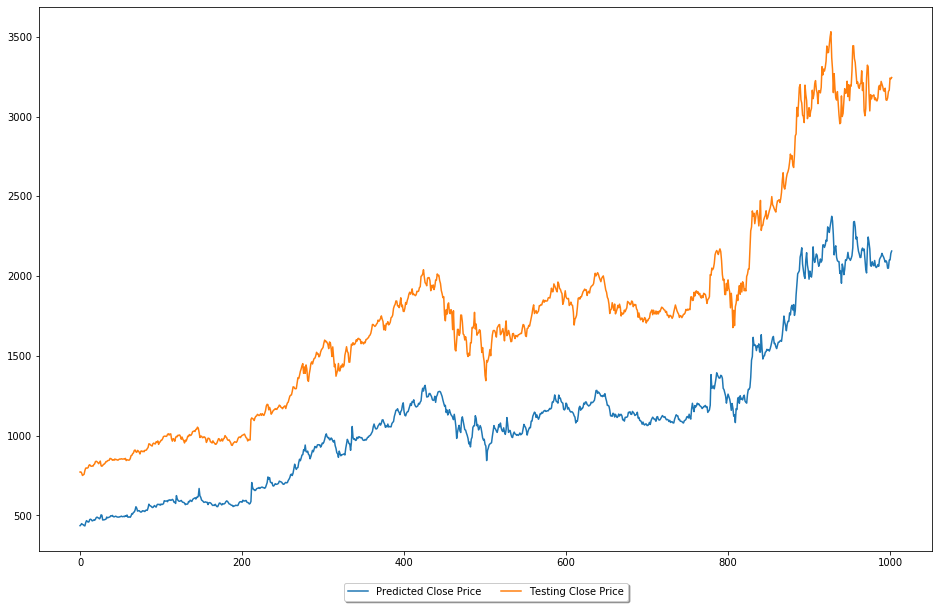

In [99]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()